In [41]:
import pandas as pd
a = pd.read_csv('/content/drive/MyDrive/Wine.csv')
print(a)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

In [42]:
features = a.drop('Customer_Segment',axis = 1)
target = a['Customer_Segment']
print(features)
print(target)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

In [43]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size=0.2, random_state=42)

In [44]:
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy * 100,"%")

Accuracy:  100.0 %


In [45]:
n_components = 2
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_pca, y_train)
y_pred = svm_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ",accuracy * 100,"%")

Accuracy:  75.0 %


In [46]:
b = pd.read_csv('/content/drive/MyDrive/breast_cancer_survival (1).csv')
print(b)

     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

                          Histology ER status PR status HER2 status  \
0     Infiltrating Ductal Carcinoma  Positive  Posit

In [47]:
b=b.drop(columns=['Histology','Surgery_type','Date_of_Surgery','Date_of_Last_Visit'],axis=1)
print(b)


     Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0     42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1     54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2     63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3     78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4     42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
..   ...     ...       ...       ...       ...       ...          ...   
329   59  FEMALE  0.024598   1.40050  0.024751  0.280320           II   
330   41  FEMALE  0.100120  -0.46547  0.472370 -0.523870            I   
331   54  FEMALE  0.753820   1.64250 -0.332850  0.857860           II   
332   74  FEMALE  0.972510   1.42680 -0.366570 -0.107820           II   
333   66  FEMALE  0.286380   1.39980  0.318830  0.836050           II   

    ER status PR status HER2 status Patient_Status  
0    Positive  Positive    Negative          Alive  
1    Positive  Po

In [53]:
columns_to_replace= ['ER status', 'PR status', 'HER2 status']
b[columns_to_replace] = b[columns_to_replace].replace({'Positive': 1, 'Negative': 0})
b['Tumour_Stage'] = b['Tumour_Stage'].replace({'I':1,'II':2,'III':3,'IV':4})
b['Gender'] = b['Gender'].replace({'MALE':1,'FEMALE':0})
b['Patient_Status']= b['Patient_Status'].replace({'Alive':1,'Dead':0})
mean = b['Patient_Status'].mean()
b['Patient_Status'].fillna(mean, inplace=True)
print(b)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     ER status  PR status  HER2 status  Patient_Status  
0            1          1            0             1.0

In [54]:
features_b = b.drop('Patient_Status',axis=1)
target_b = b['Patient_Status']
print(features_b)
print(target_b)

     Age  Gender  Protein1  Protein2  Protein3  Protein4  Tumour_Stage  \
0     42       0  0.952560   2.15000  0.007972 -0.048340             2   
1     54       0  0.000000   1.38020 -0.498030 -0.507320             2   
2     63       0 -0.523030   1.76400 -0.370190  0.010815             2   
3     78       0 -0.876180   0.12943 -0.370380  0.132190             1   
4     42       0  0.226110   1.74910 -0.543970 -0.390210             2   
..   ...     ...       ...       ...       ...       ...           ...   
329   59       0  0.024598   1.40050  0.024751  0.280320             2   
330   41       0  0.100120  -0.46547  0.472370 -0.523870             1   
331   54       0  0.753820   1.64250 -0.332850  0.857860             2   
332   74       0  0.972510   1.42680 -0.366570 -0.107820             2   
333   66       0  0.286380   1.39980  0.318830  0.836050             2   

     ER status  PR status  HER2 status  
0            1          1            0  
1            1          1    

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
accuracy_list = []
for i in range(50):
  X_train,X_test,y_train,y_test=train_test_split(features_b,target_b,test_size=0.1)
  lr=LogisticRegression(max_iter=1000)
  lrclf=lr.fit(X_train,y_train)
  y_pred=lrclf.predict(X_test)
  accuracy=accuracy_score(y_test, y_pred)
  accuracy_list.append(accuracy)
print(accuracy_list)

[0.6764705882352942, 0.8823529411764706, 0.8529411764705882, 0.8235294117647058, 0.8529411764705882, 0.8235294117647058, 0.7647058823529411, 0.8823529411764706, 0.7352941176470589, 0.7941176470588235, 0.8235294117647058, 0.7647058823529411, 0.8529411764705882, 0.7058823529411765, 0.7058823529411765, 0.8529411764705882, 0.7941176470588235, 0.6764705882352942, 0.8235294117647058, 0.7647058823529411, 0.7647058823529411, 0.8823529411764706, 0.9117647058823529, 0.8529411764705882, 0.8529411764705882, 0.6764705882352942, 0.8529411764705882, 0.7647058823529411, 0.8235294117647058, 0.7941176470588235, 0.6764705882352942, 0.7058823529411765, 0.7647058823529411, 0.7058823529411765, 0.8529411764705882, 0.8235294117647058, 0.7941176470588235, 0.8235294117647058, 0.8529411764705882, 0.7941176470588235, 0.6764705882352942, 0.7941176470588235, 0.8529411764705882, 0.7647058823529411, 0.7647058823529411, 0.7941176470588235, 0.6764705882352942, 0.8823529411764706, 0.7058823529411765, 0.6470588235294118]

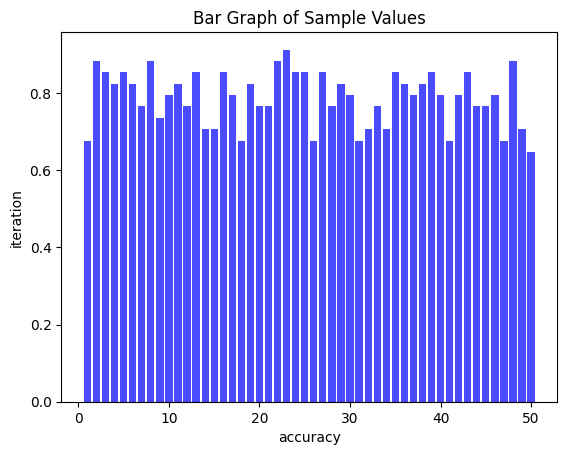

In [59]:
import matplotlib.pyplot as plt
numbers = list(range(1, 51))
plt.bar(numbers,accuracy_list, color='b', alpha=0.7)
plt.xlabel('accuracy')
plt.ylabel('iteration')
plt.title('Bar Graph of Sample Values')
plt.show()

In [62]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')
accuracy_list2 = []
for i in range(51):
  X_train,X_test,y_train,y_test=train_test_split(features_b,target_b,test_size=0.1)
  svm_classifier.fit(X_train, y_train)
  y_pred = svm_classifier.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  accuracy_list2.append(accuracy)
print(accuracy_list2)




[0.7647058823529411, 0.7941176470588235, 0.6176470588235294, 0.7941176470588235, 0.7352941176470589, 0.7352941176470589, 0.7941176470588235, 0.7058823529411765, 0.6764705882352942, 0.7058823529411765, 0.7941176470588235, 0.8235294117647058, 0.7941176470588235, 0.6764705882352942, 0.7941176470588235, 0.6764705882352942, 0.7647058823529411, 0.7352941176470589, 0.7647058823529411, 0.7941176470588235, 0.6470588235294118, 0.7352941176470589, 0.7352941176470589, 0.6764705882352942, 0.8235294117647058, 0.8529411764705882, 0.8529411764705882, 0.8823529411764706, 0.7058823529411765, 0.7941176470588235, 0.7647058823529411, 0.6764705882352942, 0.7352941176470589, 0.7941176470588235, 0.6764705882352942, 0.8529411764705882, 0.8235294117647058, 0.6470588235294118, 0.7941176470588235, 0.8529411764705882, 0.7941176470588235, 0.7941176470588235, 0.8823529411764706, 0.7058823529411765, 0.9117647058823529, 0.8823529411764706, 0.7941176470588235, 0.6764705882352942, 0.7941176470588235, 0.7352941176470589,

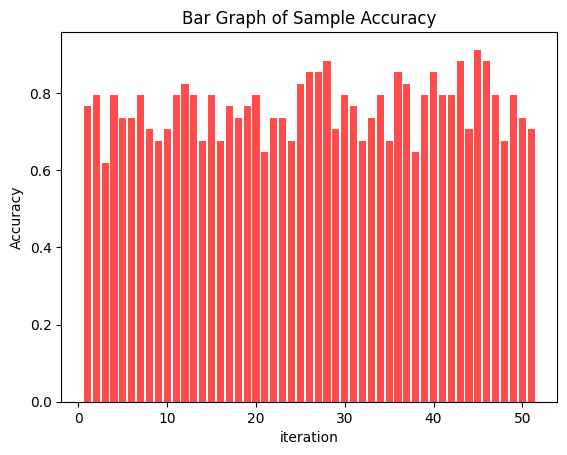

In [67]:
import matplotlib.pyplot as plt
numbers = list(range(1, 52))
plt.bar(numbers, accuracy_list2, color='r', alpha=0.7)
plt.xlabel('iteration')
plt.ylabel('Accuracy')
plt.title('Bar Graph of Sample Accuracy')
plt.show()
